In [1]:
import os, csv
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras import layers, Input
from keras.optimizers import RMSprop, Adam
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

import csv
import os,random

from keras.models import Sequential
from keras.layers import Dense, Bidirectional, LSTM, Masking
from keras.layers.convolutional import Convolution1D
from keras.layers.core import Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import *
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

import datetime
now = datetime.datetime.now

In [2]:
def process(temp):
    min_len = 3000
    for i in range(11):
        j = 0
        while temp[j][i] != '' and j<len(temp)-1:
            j+=1
        min_len = min(min_len, j);
#     print(min_len)
    return temp[:min_len]

In [3]:
types = {'B_ID':8, 'E_ID':16, 'NE_ID':27, 'S_ID':10, 'P_ID':16}
x_val = []
x_id = []
for ids, vals in types.items():
    for i in range(1,vals+1):
        x_id.append(ids + str(i))
        try: 
            with open("../po-cf-ex-1-features/"+ids+str(i)+".csv", 'r') as f:
                temp = list(csv.reader(f, delimiter = ","))
            temp = process(temp)
            temp = np.asarray(temp)
            temp = temp.astype(np.float64)
        except:
            print("Problem in:", ids, i)
            continue
        x_val.append(temp)

x_val = np.asarray(sequence.pad_sequences(x_val, padding='post',maxlen=2500)).astype(np.float64)
print(len(x_val))
for i in range(len(x_val)):
    print(x_val[i].shape)
   


77
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)
(2500, 11)


In [23]:
po_val = []
cf_val = []
for ids in x_id:
    try:
        df = pd.read_excel("../KiMoRe/"+ids+"/Es1/Label/ClinicalAssessment_"+ids+".xlsx")
    except:
        print("problem in: ", ids)
        continue
    df = np.array(df).reshape((16,))
    po_val.append(df[6])
    cf_val.append(df[11])
po_val = np.asarray(po_val).astype(np.float64)
cf_val = np.asarray(cf_val).astype(np.float64)
ts_val = po_val
print("shape of CF: ", cf_val.shape)
print("shape of PO: ", po_val.shape)
print("shape of TS: ", ts_val.shape)
# print(po_val)
for i in range(len(ts_val)):
    if np.isnan(ts_val[i]):
        print(i)
print(ts_val)


/home/yash/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


shape of CF:  (77,)
shape of PO:  (77,)
shape of TS:  (77,)
[15.         12.          9.39439192  7.78382608 13.         15.
  8.         14.33333333 14.66666667 14.33333333 13.33333333 14.
 14.33333333 15.         15.         14.66666667 15.         15.
 15.         15.         15.         15.         15.         15.
 12.66666667 14.33333333 15.         14.33333333 13.         14.
 15.         15.         15.          7.         15.         15.
 15.         15.         12.         15.         13.         13.
 15.         13.         14.         14.         10.         15.
 13.         15.         15.          3.         11.         15.
  6.          7.58350731  8.41349572  6.33333333 11.          6.33333333
 10.         13.          9.         15.          7.          6.
 15.          7.          8.         15.         12.83313884  5.66666667
 10.33333333 11.66666667 15.          9.         14.66666667]


In [24]:
def jumble_up(val):
    return np.random.permutation(val)

In [25]:
indices = np.arange(len(ts_val))
indices = jumble_up(indices)
print(indices)
temp_x = x_val
temp_ts = ts_val
for i in range(len(ts_val)):
    x_val[i] = temp_x[indices[i]]
    ts_val[i] = temp_ts[indices[i]]

[30 21 42 35 10 37  5 25 28 58  0 57 75 45 56 55 16 59 63 13 53 44 36 29
 60 69 15 32 67 34 73 14 52 38 62 26 18 49 43 64 12 33 31  4 71 51  7 48
  8 20  3 65 47 17 46 19 68 66 11 40 41  2 50 22 70 27  1 24 76 54  6  9
 72 74 39 61 23]


In [26]:
max_x_val = -1
max_ts_val = -1
for i in range(len(ts_val)):
    max_x_val = max(max_x_val, np.max(np.abs(x_val[i])))
    max_ts_val = max(max_ts_val, np.max(np.abs(ts_val[i])))
x_val = x_val/max_x_val
ts_val = ts_val/max_ts_val
x_train, x_test, y_train, y_test = train_test_split(x_val,ts_val, test_size=0.3)
print(y_train)

[0.95555556 0.50556715 0.42222222 1.         1.         0.93333333
 0.53333333 0.42222222 1.         0.77777778 1.         1.
 0.86666667 0.93333333 1.         0.56089971 1.         0.56089971
 0.37777778 1.         0.95555556 0.88888889 0.73333333 0.46666667
 0.6        0.8        0.46666667 1.         0.42222222 1.
 0.95555556 0.6        1.         0.50556715 0.2        0.6
 0.8        1.         1.         1.         0.73333333 1.
 0.66666667 1.         1.         0.86666667 1.         1.
 0.85554259 0.4        0.86666667 1.         1.        ]


In [27]:
# timesteps = 600 
nr = 77   
n_dim = 11
dropout_rate = 0.1

In [12]:
def train_generator(lim):
    n=0
    while n<lim:
        i = n%54
        xt = []
        yt = []
        xt.append(x_train[i])
        yt.append(y_train[i])
        xt = np.array(xt).astype('float32')
        yt = np.array(yt).astype('float32')
        yield xt,yt
        n+=1
        

In [13]:
def val_generator(lim):
    n=0
    while n<lim:
        i = n%24
        xt = []
        yt = []
        xt.append(x_test[i])
        yt.append(y_test[i])
        xt = np.array(xt).astype('float32')
        yt = np.array(yt).astype('float32')
        yield xt,yt
        n+=1

In [ ]:
n=0
while n<216:
    n = n%54
    n+=1
    print(n)

In [33]:
def Network():
    model = Sequential()
    model.add(Masking(mask_value=0, input_shape=(None, n_dim)))
    model.add(Bidirectional(LSTM(64, recurrent_dropout = 0.5, return_sequences = True), input_shape = (None,n_dim)))
    model.add(Dropout(0.4))

    model.add(Bidirectional(LSTM(32, recurrent_dropout = 0.5,return_sequences = True)))
    model.add(Dropout(0.25))

    model.add(Convolution1D(16, 1))
    model.add(Activation('sigmoid'))

    model.add(Convolution1D(8, 1))
    model.add(Activation('sigmoid'))

    model.add(Convolution1D(1, 1))
    model.add(Activation('sigmoid'))

    print(model.summary())
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    # Early stopping if the validaton Loss does not decrease for 100 epochs
    early_stopping = EarlyStopping(monitor='val_loss', patience = 50)

    t = now()
    history = model.fit(x_train,y_train,batch_size=5, epochs=500, verbose=1,
                        validation_data=(x_test,y_test),callbacks = [early_stopping])
    print('Training time: %s' % (now() - t))
    
    # Plot the results
    plt.figure(1)
    plt.subplot(221)
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.subplot(222)
    plt.plot(history.history['val_loss'])
    plt.title('Validation Loss')
    plt.tight_layout()
    plt.show()
    
    # Plot the prediction of the CNN model for the training and validation sets
    pred_test = model.predict(x_test)
    pred_train = model.predict(x_train)
    
    plt.figure(figsize = (8,8))
    plt.subplot(2,1,1)
    plt.plot(pred_train,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_train,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.ylim([-0.1,1.1])
    plt.title('Training Set',fontsize=18)
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Scale',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.subplot(2,1,2)
    plt.plot(pred_test,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_test,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.title('Testing Set',fontsize=18)
    plt.ylim([-0.1,1.1])
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Score',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.tight_layout()
#     plt.savefig('../../Results/CNN_Vicon_Scores.png', dpi=300)
    plt.show()
    
    
    # Calculate the cumulative deviation and rms deviation for the validation set
    test_dev = abs(np.squeeze(pred_test)-y_test)
    # Cumulative deviation
    mean_abs_dev = np.mean(test_dev)
    # RMS deviation
    rms_dev = sqrt(mean_squared_error(pred_test, y_test))
    print('Mean absolute deviation:', mean_abs_dev)
    print('RMS deviation:', rms_dev)
    
    return mean_abs_dev, rms_dev

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, None, 11)          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         38912     
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 64)          41216     
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 16)          1040      
_________________________________________________________________
activation_6 (Activation)    (None, None, 16)         

Epoch 65/500
11/11 [==============================] - 35s 3s/step - loss: 0.5295 - val_loss: 0.4695
Epoch 66/500
11/11 [==============================] - 36s 3s/step - loss: 0.4837 - val_loss: 0.4713
Epoch 67/500
11/11 [==============================] - 35s 3s/step - loss: 0.4875 - val_loss: 0.4701
Epoch 68/500
11/11 [==============================] - 35s 3s/step - loss: 0.5368 - val_loss: 0.4690
Epoch 69/500
11/11 [==============================] - 35s 3s/step - loss: 0.4967 - val_loss: 0.4684
Epoch 70/500
11/11 [==============================] - 35s 3s/step - loss: 0.5686 - val_loss: 0.4711
Epoch 71/500
11/11 [==============================] - 35s 3s/step - loss: 0.4885 - val_loss: 0.4705
Epoch 72/500
11/11 [==============================] - 36s 3s/step - loss: 0.4595 - val_loss: 0.4711
Epoch 73/500
11/11 [==============================] - 35s 3s/step - loss: 0.4861 - val_loss: 0.4723
Epoch 74/500
11/11 [==============================] - 36s 3s/step - loss: 0.5227 - val_loss: 0.4753


11/11 [==============================] - 35s 3s/step - loss: 0.4925 - val_loss: 0.4611
Epoch 228/500
11/11 [==============================] - 35s 3s/step - loss: 0.4180 - val_loss: 0.4584
Epoch 229/500
11/11 [==============================] - 35s 3s/step - loss: 0.4450 - val_loss: 0.4581
Epoch 230/500
11/11 [==============================] - 36s 3s/step - loss: 0.4794 - val_loss: 0.4583
Epoch 231/500
11/11 [==============================] - 35s 3s/step - loss: 0.4955 - val_loss: 0.4562
Epoch 232/500
11/11 [==============================] - 35s 3s/step - loss: 0.4995 - val_loss: 0.4567
Epoch 233/500
11/11 [==============================] - 36s 3s/step - loss: 0.5213 - val_loss: 0.4571
Epoch 234/500
11/11 [==============================] - 35s 3s/step - loss: 0.5073 - val_loss: 0.4566
Epoch 235/500
11/11 [==============================] - 36s 3s/step - loss: 0.4597 - val_loss: 0.4560
Epoch 236/500
11/11 [==============================] - 36s 3s/step - loss: 0.4406 - val_loss: 0.4575
Epoc

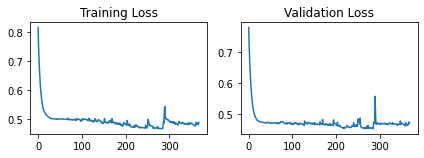

UnknownError:  IndexError: index 53 is out of bounds for axis 0 with size 53
Traceback (most recent call last):

  File "/home/yash/.local/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 249, in __call__
    ret = func(*args)

  File "/home/yash/.local/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 620, in wrapper
    return func(*args, **kwargs)

  File "/home/yash/.local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 891, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/home/yash/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 807, in wrapped_generator
    for data in generator_fn():

  File "<ipython-input-12-d08bdea3a3fd>", line 7, in train_generator
    xt.append(x_train[i])

IndexError: index 53 is out of bounds for axis 0 with size 53


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_predict_function_56227]

Function call stack:
predict_function


In [34]:
Mean_abs_dev, RMS_dev  = Network()

0.0003
